In [1]:
!pip install openpyxl matplotlib


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: C:\Users\PC\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
np.random.seed(1)
n = 100
dates = pd.date_range(start = '2050-01-01', periods=n, freq='D')
products = np.random.choice(['Tablet', 'Camera', 'Phone', 'Mic', 'Keyboard'], n)
prices = np.round(np.random.uniform(50, 200.0, n), 2)
quantities = np.random.randint(1, 15, n)

data = {
    'Date': dates,
    'Product': products,
    'Price': prices,
    'Quantity': quantities
}
df = pd.DataFrame(data)
df

,Date,Product,Price,Quantity
0,2050-01-01,Mic,147.16,7
1,2050-01-02,Keyboard,103.09,10
2,2050-01-03,Tablet,164.48,7
3,2050-01-04,Camera,103.48,1
4,2050-01-05,Mic,162.92,1
...,...,...,...,...
95,2050-04-06,Phone,119.32,8
96,2050-04-07,Tablet,69.84,7
97,2050-04-08,Phone,164.64,3
98,2050-04-09,Keyboard,81.91,11


In [4]:
df.dtypes

Date        datetime64[ns]
Product             object
Price              float64
Quantity             int32
dtype: object

In [5]:
df.to_csv('random_sales.csv', index=False)

In [6]:
df = pd.read_csv('random_sales.csv', parse_dates=['Date'], date_format='%Y-%m-%d')
df

,Date,Product,Price,Quantity
0,2050-01-01,Mic,147.16,7
1,2050-01-02,Keyboard,103.09,10
2,2050-01-03,Tablet,164.48,7
3,2050-01-04,Camera,103.48,1
4,2050-01-05,Mic,162.92,1
...,...,...,...,...
95,2050-04-06,Phone,119.32,8
96,2050-04-07,Tablet,69.84,7
97,2050-04-08,Phone,164.64,3
98,2050-04-09,Keyboard,81.91,11


In [7]:
df.dtypes

Date        datetime64[ns]
Product             object
Price              float64
Quantity             int64
dtype: object

In [8]:
df.to_excel('sales_data.xlsx', index=False)

In [9]:
df.to_json('sales_data.json')

In [10]:
df.describe()

,Date,Price,Quantity
count,100,100.000000,100.000000
mean,2050-02-19 12:00:00,117.319000,7.790000
min,2050-01-01 00:00:00,51.350000,1.000000
25%,2050-01-25 18:00:00,81.130000,5.000000
50%,2050-02-19 12:00:00,114.105000,8.000000
75%,2050-03-16 06:00:00,161.207500,11.250000
max,2050-04-10 00:00:00,197.260000,14.000000
std,NaN,42.469805,4.030928


In [11]:
df.values

array([[Timestamp('2050-01-01 00:00:00'), 'Mic', 147.16, 7],
       [Timestamp('2050-01-02 00:00:00'), 'Keyboard', 103.09, 10],
       [Timestamp('2050-01-03 00:00:00'), 'Tablet', 164.48, 7],
       [Timestamp('2050-01-04 00:00:00'), 'Camera', 103.48, 1],
       [Timestamp('2050-01-05 00:00:00'), 'Mic', 162.92, 1],
       [Timestamp('2050-01-06 00:00:00'), 'Tablet', 182.2, 3],
       [Timestamp('2050-01-07 00:00:00'), 'Tablet', 51.75, 13],
       [Timestamp('2050-01-08 00:00:00'), 'Camera', 124.72, 10],
       [Timestamp('2050-01-09 00:00:00'), 'Keyboard', 61.07, 7],
       [Timestamp('2050-01-10 00:00:00'), 'Keyboard', 168.04, 1],
       [Timestamp('2050-01-11 00:00:00'), 'Camera', 59.61, 7],
       [Timestamp('2050-01-12 00:00:00'), 'Phone', 103.3, 8],
       [Timestamp('2050-01-13 00:00:00'), 'Keyboard', 191.28, 1],
       [Timestamp('2050-01-14 00:00:00'), 'Phone', 106.97, 4],
       [Timestamp('2050-01-15 00:00:00'), 'Keyboard', 164.44, 10],
       [Timestamp('2050-01-16 00:00:00'

In [12]:
df.values[:3]

array([[Timestamp('2050-01-01 00:00:00'), 'Mic', 147.16, 7],
       [Timestamp('2050-01-02 00:00:00'), 'Keyboard', 103.09, 10],
       [Timestamp('2050-01-03 00:00:00'), 'Tablet', 164.48, 7]],
      dtype=object)

In [13]:
df.groupby

<bound method DataFrame.groupby of          Date   Product   Price  Quantity
0  2050-01-01       Mic  147.16         7
1  2050-01-02  Keyboard  103.09        10
2  2050-01-03    Tablet  164.48         7
3  2050-01-04    Camera  103.48         1
4  2050-01-05       Mic  162.92         1
..        ...       ...     ...       ...
95 2050-04-06     Phone  119.32         8
96 2050-04-07    Tablet   69.84         7
97 2050-04-08     Phone  164.64         3
98 2050-04-09  Keyboard   81.91        11
99 2050-04-10    Camera   61.14        13

[100 rows x 4 columns]>

In [14]:
product_sales = df.groupby('Product')['Quantity'].sum()
product_sales

Product
Camera      186
Keyboard    173
Mic         106
Phone       124
Tablet      190
Name: Quantity, dtype: int64

In [19]:
average_prices = df.groupby('Product')['Price'].mean().round(2)
average_prices

Product
Camera      121.54
Keyboard    115.61
Mic         129.43
Phone       123.47
Tablet      100.17
Name: Price, dtype: float64

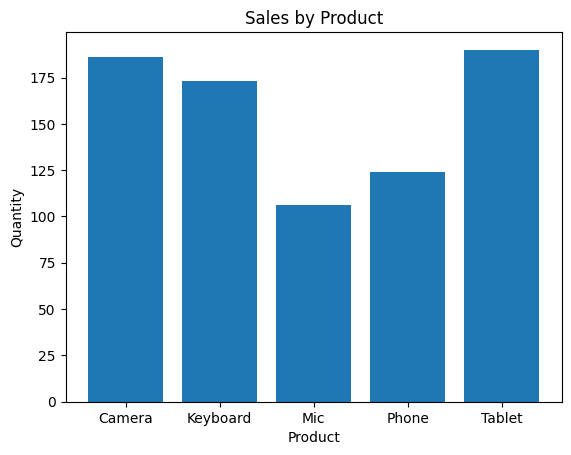

In [18]:
plt.bar(product_sales.index, product_sales.values)
plt.title("Sales by Product")
plt.xlabel("Product")
plt.ylabel("Quantity")
plt.show()

Text(0, 0.5, 'Average Price')

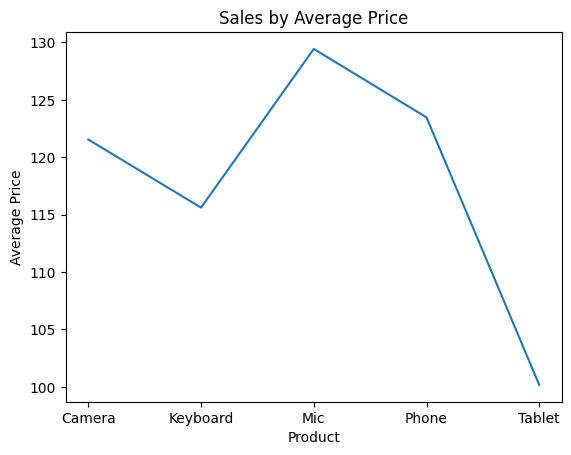

In [23]:
plt.plot(average_prices.index, average_prices.values)
plt.title("Sales by Average Price")
plt.xlabel("Product")
plt.ylabel("Average Price")